In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import ipywidgets as widgets

plt.style.use(['science', 'notebook', 'dark_background'])
plt.style.use(['science', 'notebook', 'dark_background', 'grid'])
plt.style.use(['science', 'notebook', 'dark_background'])

In [2]:
x = np.random.uniform(0,5, size = 100)
ep = np.random.normal(size= 100)

y = 2*x + ep

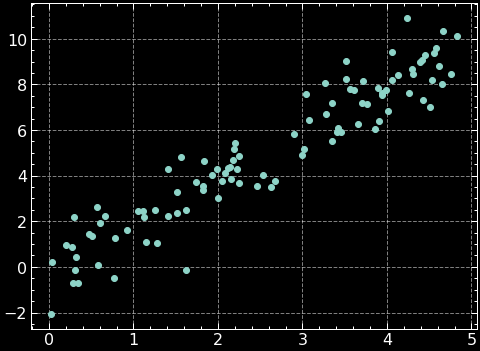

In [3]:
plt.scatter(x, y);

In [4]:
x_values = np.linspace(0, 10, 500)

In [5]:
def slope_vis(m=1):
    plt.scatter(x,y)
    plt.plot(x_values, m*x_values, lw = 3, color = "#ffffff")
    
    plt.ylim(0, 10)
    

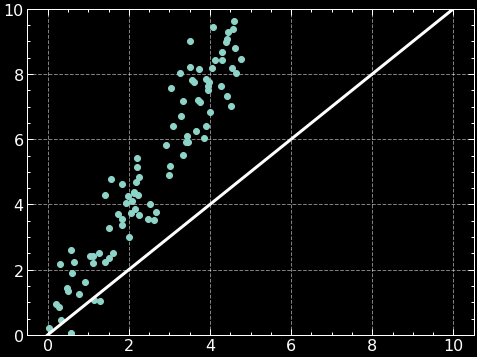

In [6]:
slope_vis()

In [7]:
widgets.interact(slope_vis, m=(0.2, 5, 0.2))

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.2, step=0.2), Output()), _dom_cla…

<function __main__.slope_vis(m=1)>

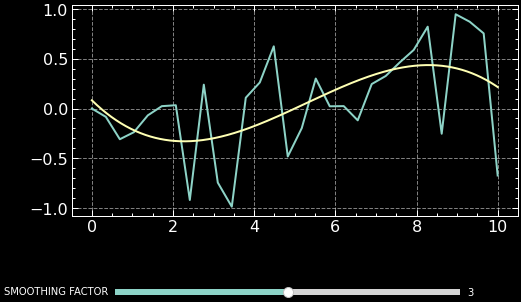

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.interpolate import UnivariateSpline
from matplotlib.widgets import Slider

plt.style.use(['science', 'notebook', 'dark_background'])
plt.style.use(['science', 'notebook', 'dark_background', 'grid'])
plt.style.use(['science', 'notebook', 'dark_background'])

x = np.linspace(0, 10, 30)
y = np.sin(0.5*x)*np.sin(x*np.random.randn(30))

spline = UnivariateSpline(x, y, s = 6)
x_spline = np.linspace(0, 10, 1000)
y_spline = spline(x_spline)

# plot

fig = plt.figure()
ax = fig.subplots()

# add slider
plt.subplots_adjust(bottom = 0.39)

p = ax.plot(x,y)
p, = ax.plot(x_spline, y_spline)

ax_slide = plt.axes([0.2, 0.2, 0.6, 0.03]) # slider info
s_factor = Slider(ax_slide, 'SMOOTHING FACTOR', valmin=0, valmax=6, valinit=3, valstep=0.1)

def update(val):
    spline = UnivariateSpline(x, y, s = s_factor.val)
    p.set_ydata(spline(x_spline))
    fig.canvas.draw() # draw the figure

s_factor.on_changed(update)
plt.show()
